# IMPORTING LIBRARIES

In [20]:
#Importing libraries for data cleaning, processing and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express  as px
import time
from wordcloud import WordCloud
from collections import Counter

#Libraries for Natural Language processing
import nltk
from nltk import TreebankWordTokenizer, SnowballStemmer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import string
import urllib
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mapas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mapas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mapas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# READING THE DATA

In [3]:
df=pd.read_csv('complaints_processed.csv')
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


# EXPLORATORY DATA ANALYSIS

**Pie chart showing the distribution of consumer complaints**

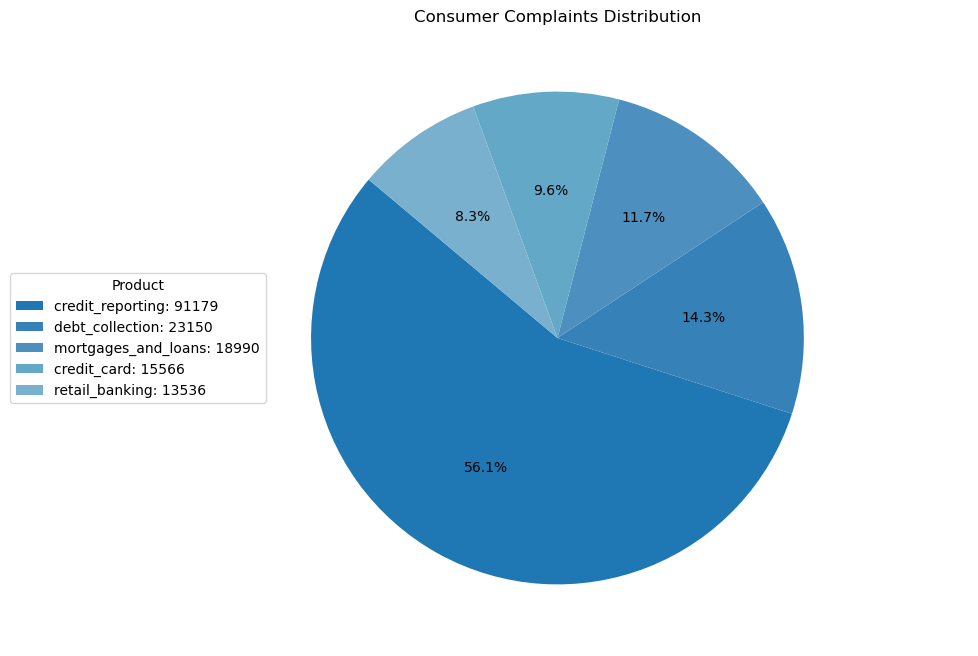

In [4]:
# Get the value counts for the 'product' column
product_counts = df['product'].value_counts()

# Set custom shades of blue
colors = ['#1f77b4', '#3581b8', '#4d8fbf', '#63a8c6', '#79b0cd']

# Plotting the pie chart
plt.figure(figsize=(8, 8))  # Set the figure size (optional)
wedges, texts, _ = plt.pie(product_counts.values, labels=product_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Set the text in the center of each slice with the exact count
for text in texts:
    text.set_color('white')  # Setting text color to white
    text.set_fontsize(12)  # Setting text font size
    text.set_fontweight('bold')  # Setting text font weight

# Adding the count as legend on the left side
legend_labels = [f'{product}: {count}' for product, count in zip(product_counts.index, product_counts.values)]
plt.legend(wedges, legend_labels, title='Product', loc='center left', bbox_to_anchor=(-0.4, 0.5))

# Title
plt.title('Consumer Complaints Distribution')

# Displaying the plot
plt.show()

**Observation:**

- Consumer complaints are directed to five departments namely: credit reporting, debt collection, mortgages & loans, credit cards and retail banking. 
- Most of the consumer complaints are directed to credit reporting departing, it accounts to more than 50% of the consumer complaints. The class imbalance will be handled during feature engineering to ensure the robustness of the model. 
- Credit reporting is a department that gather and maintain information about individuals' credit activities and creditworthiness. 

**A bar graph showing the distribution of word count for each deprtment consumer complaint.**

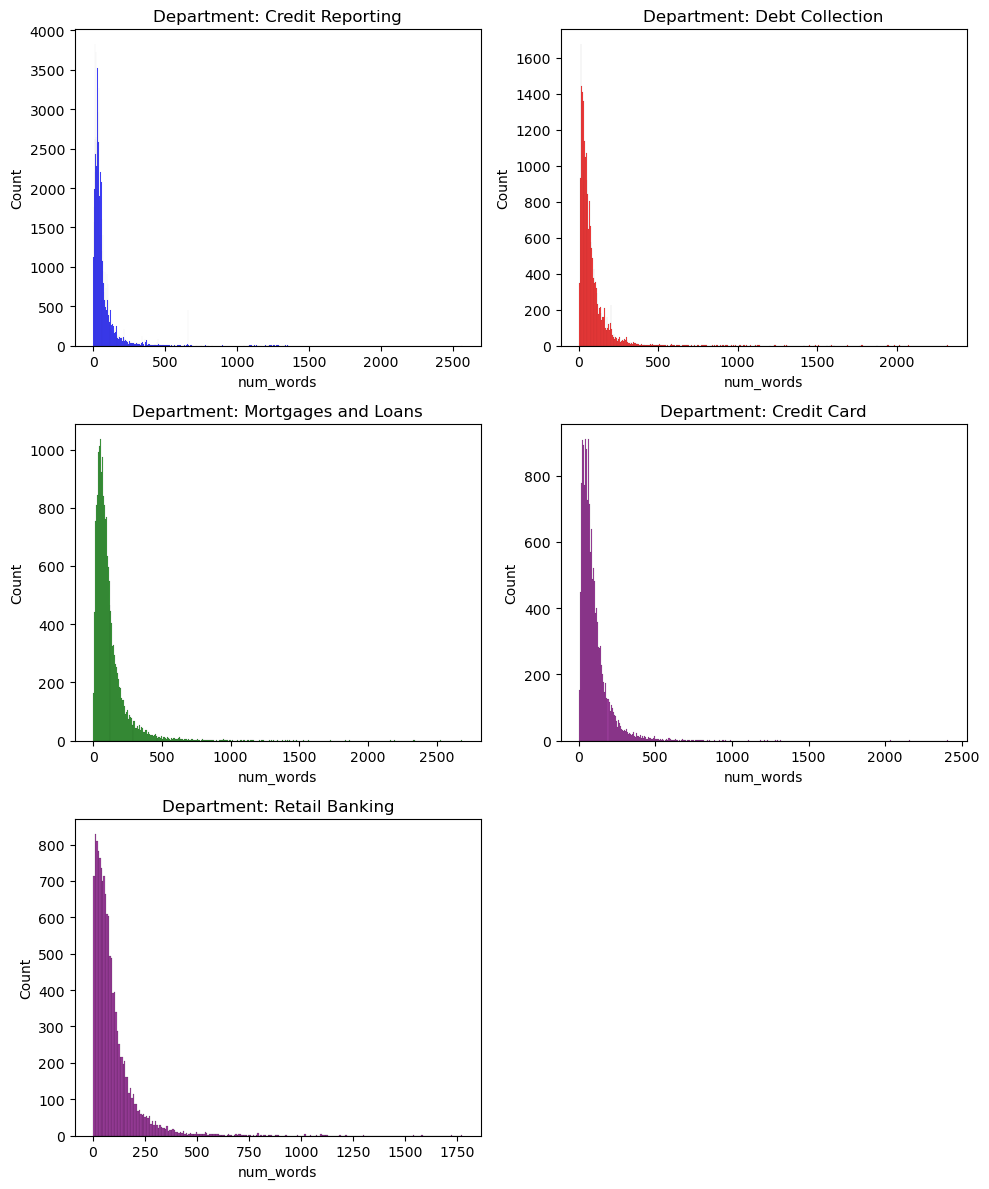

In [5]:
#Changing the narrative column to string
df['narrative']=df['narrative'].astype(str)

#Creating a number of Words feature
df['num_words']=df['narrative'].apply(lambda x:len(nltk.word_tokenize(x)))

# Creating a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 12))

# Plot histogram for  'credict_reporting'
sns.histplot(df[df['product'] == 'credit_reporting']['num_words'], ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Department: Credit Reporting')

# Plotting histogram for 'debt_collection'
sns.histplot(df[df['product'] == 'debt_collection']['num_words'], ax=axes[0, 1], color='red')
axes[0, 1].set_title('Department: Debt Collection')

# Plotting histogram for  'mortgages_and_loans'
sns.histplot(df[df['product'] == 'mortgages_and_loans']['num_words'], ax=axes[1, 0], color='green')
axes[1, 0].set_title('Department: Mortgages and Loans')

# Plotting histogram for'credit_card'
sns.histplot(df[df['product'] == 'credit_card']['num_words'], ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Department: Credit Card')

# Plotting histogram for 'retail_banking'
sns.histplot(df[df['product'] == 'retail_banking']['num_words'], ax=axes[2, 0], color='purple')
axes[2, 0].set_title('Department: Retail Banking')

# An empty subplot for spacing
axes[2, 1].axis('off')

# Adjusting the spacing between subplots
plt.tight_layout()

# Showingthe subplots
plt.show()


**Observation:**

**Removing stopwords**

In [10]:
#A function of removing stopwords
def remove_stopwords(text):
    """
    Remove stopwords from the given text.

    Args:
        text (str): The input text from which stopwords are to be removed.

    Returns:
        str: The text with stopwords removed.
    """
    stop_words = set(stopwords.words('english'))  # Set of stopwords in English
    tokens = text.split()                         # Splitting the text into individual words
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]  # Filtering out stopwords
    return ' '.join(filtered_tokens)              # Joining the filtered tokens back into a text

#Removing stop words from training data
df['updated_message'] = df['narrative'].apply(remove_stopwords)
#Viewing the changes on the training dataframe
df.head()

,Unnamed: 0,product,narrative,num_words,updated_message
0,0,credit_card,purchase order day shipping amount receive pro...,230,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...,132,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...,173,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...,131,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...,123,payment history missing credit report made mis...


**Removing punctuations**

In [13]:
#A function of removing puntuationa marks
def remove_punctuation(post):
    """
    Remove punctuation marks from the given post.

    Args:
        post (str): The input post from which punctuation marks are to be removed.

    Returns:
        str: The post with punctuation marks removed.
    """
    return ''.join([l for l in post if l not in string.punctuation])

# Create and Check if a new column contains messages with no punctuations
df['updated_message'] = df['updated_message'].apply(remove_punctuation).str.lower() #Words converted to lower case
#Viewing changes made on the training daraframe
df.head()

,Unnamed: 0,product,narrative,num_words,updated_message
0,0,credit_card,purchase order day shipping amount receive pro...,230,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...,132,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...,173,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...,131,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...,123,payment history missing credit report made mis...


**Masking each department**

In [31]:
#Credit Reporting
credit = df.loc[df['product'] == 'credit_reporting', 'updated_message']
#Debt Collection
debt = df.loc[df['product'] == 'debt_collection', 'updated_message']
#Mortgages and loans
mortgages = df.loc[df['product'] == 'mortgages_and_loans', 'updated_message']
#Credit cards
cards = df.loc[df['product'] == 'credit_card', 'updated_message']
#Retail banking
retail = df.loc[df['product'] == 'retail_banking', 'updated_message']

**Word Clouds for the five departments**

Category: credit reporting, Number of Words: 6178595
Category: debt collection, Number of Words: 1822791
Category: Mortgages and loans, Number of Words: 2230737
Category: credit cards, Number of Words: 1527748
Category: retail banking, Number of Words: 1266790


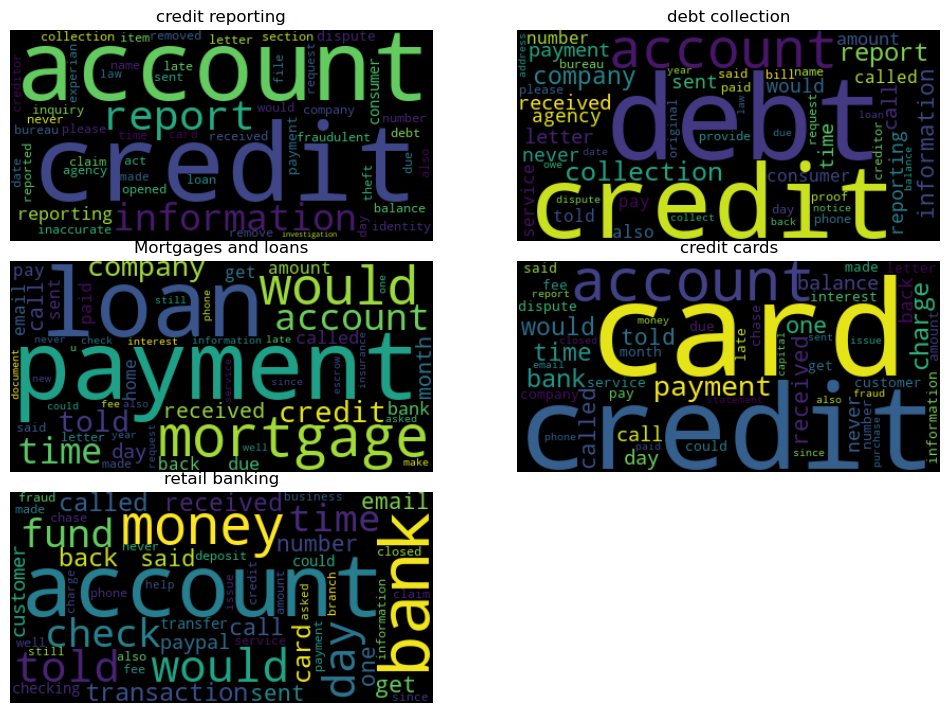

In [32]:
# Define the categories and their respective texts
categories = ['credit reporting', 'debt collection', 'Mortgages and loans', 'credit cards', 'retail banking']
texts = [credit, debt, mortgages, cards, retail]

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 9))
fig.subplots_adjust(hspace=0)  # Adjusting the hspace parameter to remove vertical spacing

# Generate word clouds for each category and plot them
for i, ax in enumerate(axs.flat):
    if i < len(categories):  # Ensure we only use the first five categories
        # Calculating word distribution
        text = ' '.join(texts[i])
        words = text.split()
        print(f"Category: {categories[i]}, Number of Words: {len(words)}")  # Add this line to check the number of words

        # Generating word cloud
        wordcloud = WordCloud(max_words=50)
        wordcloud.generate_from_frequencies(Counter(words))

        # Ploting  the word cloud
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')
        ax.set_title(categories[i])
    else:
        ax.axis('off')

# Showing the subplots
plt.show()